<a href="https://colab.research.google.com/github/mpvalentini/IGNORAR/blob/master/Escuelas_y_conectividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
!pip install chardet
!pip install plotly
import chardet
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.core.display import HTML 

plt.style.use('ggplot')
%matplotlib inline

# **LEEMOS DATASETS**

---



En el año 1996, comenzó a implementarse el Sistema Federal de Información Educativa que
garantiza la homogeneidad y comparabilidad de los datos en todo el ámbito nacional. A través
del Relevamiento Anual, se obtiene información referida a establecimientos, alumnos, cargos y
horas docentes del sistema de educación argentino, abarcando todos los establecimientos
educativos del país y con fecha única de captura al 30 de abril de cada año. En 2011, se implementaron nuevos sistemas informáticos Web para la carga y consulta de datos,
desarrollados en software libre, con base de datos Postgres lo que permite dinamizar los
procesos implicados en la captura y consulta de los datos.

In [117]:
# LECTURA DE DATASETS

# Dataset población 
poblacion_2018 = pd.read_csv('https://www.dropbox.com/s/gt2rd89ip2onzdk/2018%20Base%206-%20Poblacion.csv?dl=1', sep=";", encoding='latin1')

# Dataset caracteristicas del establecimiento
caracteristicas_estab_2018 = pd.read_csv('https://www.dropbox.com/s/ihhicq1kib7oscy/2018%20Base%205-%20Caracteristicas.csv?dl=1', sep=";")

# Dataset de enacom, penetracion
penetracion = pd.read_csv('https://www.dropbox.com/s/865acv4ghmaf02z/Internet_Penetracion.csv?dl=1')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (111,115,119) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9,48,59,60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Población**

In [118]:
# APERTURA DATASET POBLACION

poblacion_2018.head()

,id,provincia,sector,ambito,Población Indigena - Inicial,Población Indigena - Primaria,Población Indigena - Secundaria,Población Indigena - SNU,Idiomas - Inicial - Inglés,Idiomas -Inicial - Francés,Idiomas -Inicial - Portugués,Idiomas -Inicial - Italiano,Idiomas -Inicial - Alemán,Idiomas -Inicial - Otro,Idiomas -Inicial - Más de un Idioma,Idiomas -Inicial - Hebreo,Idiomas -Inicial - Lengua indígena,Idiomas - Primaria - Inglés,Idiomas - Primaria - Francés,Idiomas - Primaria - Portugués,Idiomas - Primaria - Italiano,Idiomas - Primaria - Alemán,Idiomas - Primaria - Otro,Idiomas - Primaria - Más de un Idioma,Idiomas - Primaria - Hebreo,Idiomas - Primaria - Lengua indígena,Idiomas - Secundaria - Inglés,Idiomas - Secundaria - Francés,Idiomas - Secundaria - Portugués,Idiomas - Secundaria - Italiano,Idiomas - Secundaria - Alemán,Idiomas - Secundaria - Otro,Idiomas - Secundaria - Más de un Idioma,Idiomas - Secundaria - Hebreo,Idiomas - Secundaria - Lengua indígena,Idiomas - SNU - Inglés,Idiomas - SNU - Francés,Idiomas - SNU - Portugués,Idiomas - SNU - Italiano,Idiomas - SNU - Alemán,...,Asia - SNU,Otros - SNU,Beneficiarios de alimentación grauita - Desayuno,Beneficiarios de alimentación grauita - Almuerzo,Beneficiarios de alimentación grauita - Refrigerio,Beneficiarios de alimentación grauita - Merienda,Beneficiarios de alimentación grauita - Cena,Tenencia de computadora - Inicial,Tenencia de computadora - Primaria,Tenencia de computadora - Secundaria,Tenencia de computadora - SNU,Alumnos que nunca asistieron a sala de 5 años,Alumnos con Promoción asistida/acompañada - Primaria,Alumnos con Promoción asistida/acompañada - Secundaria,Alumnos en jornada completa - Primaria,Alumnos en jornada extendida - Primaria,Turno Mañana - Inicial,Turno Intermedio - Inicial,Turno Tarde - Inicial,Turno Doble - Inicial,Turno Mañana - Primaria,Turno Intermedio - Primaria,Turno Tarde - Primaria,Turno Doble - Primaria,Turno Mañana - Secundaria,Turno Intermedio - Secundaria,Turno Tarde - Secundaria,Turno Doble - Secundaria,Discapacidad - Con seguimiento docente estatal - Inicial,Discapacidad - Con seguimiento docente privado - Inicial,Discapacidad - Sin seguimiento docente - Inicial,Discapacidad - Con seguimiento docente estatal - Primaria,Discapacidad - Con seguimiento docente privado - Primaria,Discapacidad - Sin seguimiento docente - Primaria,Discapacidad - Con seguimiento docente estatal - Secundaria,Discapacidad - Con seguimiento docente privado - Secundaria,Discapacidad - Sin seguimiento docente - Secundaria,Discapacidad - Con seguimiento docente estatal - SNU,Discapacidad - Con seguimiento docente privado - SNU,Discapacidad - Sin seguimiento docente - SNU
0,1636896627,Buenos Aires,Estatal,Urbano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,136.0,NaN,NaN,103.0,NaN,NaN,X,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1702187228,Buenos Aires,Privado,Urbano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1762982529,Buenos Aires,Privado,Urbano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1823778030,Buenos Aires,Estatal,Urbano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,580.0,540.0,NaN,NaN,NaN,NaN,X,NaN,NaN,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,X

In [119]:
print("Cantidad total de colegios con o sin computadoras:", poblacion_2018.shape)

Cantidad total de colegios con o sin computadoras: (49434, 134)


In [ ]:
# CANTIDAD DE ESCUELAS POR SECTOR

poblacion_2018['sector'].value_counts().sort_index()

Estatal               38338
Privado               10728
Social/cooperativa      368
Name: sector, dtype: int64

In [121]:
# CANTIDAD DE ESCUELAS POR PROVINCIA

q_escuelas_provincias= poblacion_2018['provincia'].value_counts().reset_index()
q_escuelas_provincias
q_escuelas_provincias.columns = ['provincia','cantidad escuelas']
q_escuelas_provincias


,provincia,cantidad escuelas
0,Buenos Aires,16290
1,Córdoba,4547
2,Santa Fe,3474
3,Santiago del Estero,2171
4,Misiones,2163
5,Chaco,2121
6,Entre Ríos,2111
7,Mendoza,1899
8,Ciudad de Buenos Aires,1791
9,Corrientes,1683


# **Tenencia de computadora según nivel de escolaridad**

In [122]:
# FILTRO DE LOS ITEMS RELEVANTES 

df_poblacion_filtro= poblacion_2018[
                                    ['id', 'provincia', 
                                     'sector', 'Tenencia de computadora - Inicial',
                                     'Tenencia de computadora - Primaria', 
                                     'Tenencia de computadora - Secundaria']]
df_poblacion_filtro.head()

,id,provincia,sector,Tenencia de computadora - Inicial,Tenencia de computadora - Primaria,Tenencia de computadora - Secundaria
0,1636896627,Buenos Aires,Estatal,NaN,X,NaN
1,1702187228,Buenos Aires,Privado,NaN,NaN,NaN
2,1762982529,Buenos Aires,Privado,NaN,NaN,X
3,1823778030,Buenos Aires,Estatal,NaN,X,NaN
4,1884573731,Buenos Aires,Privado,NaN,X,NaN


In [123]:
# COLEGIOS QUE SI TIENEN COMPUTADORA EN ALGUNO DE SUS NIVELES

q_computadoras = df_poblacion_filtro[
      (df_poblacion_filtro['Tenencia de computadora - Inicial'] == 'X')^    
    (df_poblacion_filtro['Tenencia de computadora - Primaria'] == 'X')^(df_poblacion_filtro['Tenencia de computadora - Secundaria'] == 'X')
] 

q_computadoras


,id,provincia,sector,Tenencia de computadora - Inicial,Tenencia de computadora - Primaria,Tenencia de computadora - Secundaria
0,1636896627,Buenos Aires,Estatal,NaN,X,NaN
2,1762982529,Buenos Aires,Privado,NaN,NaN,X
3,1823778030,Buenos Aires,Estatal,NaN,X,NaN
4,1884573731,Buenos Aires,Privado,NaN,X,NaN
5,1945369632,Buenos Aires,Estatal,NaN,X,NaN
...,...,...,...,...,...,...
49422,16200324018,Tucumán,Estatal,NaN,X,NaN
49428,24300510327,Tucumán,Privado,NaN,X,NaN
49430,18000382020,Tucumán,Estatal,NaN,X,NaN
49431,18900403221,Tucumán,Estatal,X,X,X


*Cantidad de colegios por Provincias CON computadoras*

In [124]:
# TABLA CON PROVINCIAS Y SU RESPECTIVA CANTIDAD DE COLEGIOS QUE SI TIENEN COMPUTADORA EN ALGUN NIVEL

q_computadoras_filtro= df_poblacion_filtro[
      (df_poblacion_filtro['Tenencia de computadora - Inicial'] == 'X')^    
    (df_poblacion_filtro['Tenencia de computadora - Primaria'] == 'X')^(df_poblacion_filtro['Tenencia de computadora - Secundaria'] == 'X')
].pivot_table(
    index=['provincia'],
    values=['id'],
    aggfunc='count'
    
)
q_computadoras_filtro.sort_values('id',ascending=False)


q_computadoras_filtro.columns= ['q_computadoras']
q_computadoras_filtro

,q_computadoras
provincia,
Buenos Aires,12563
Catamarca,597
Chaco,1305
Chubut,508
Ciudad de Buenos Aires,1347
Corrientes,1024
Córdoba,3616
Entre Ríos,1298
Formosa,672


In [125]:
print("Cantidad total de colegios con computadoras:", q_computadoras.shape)

Cantidad total de colegios con computadoras: (34612, 6)


In [ ]:
# COLEGIOS CON COMPUTADORAS POR PROVINCIA, ORDENADOS DE MAYOR A MENOR CANTIDAD


q_computadoras_provincia= q_computadoras['provincia'].value_counts().reset_index()
q_computadoras_provincia.columns= ['provincia', 'q computadoras']
q_computadoras_provincia

,provincia,q computadoras
0,Buenos Aires,12563
1,Córdoba,3616
2,Santa Fe,2989
3,Ciudad de Buenos Aires,1347
4,Chaco,1305
5,Entre Ríos,1298
6,Misiones,1249
7,Mendoza,1092
8,Corrientes,1024
9,Santiago del Estero,942


In [ ]:
#CREAMOS UNA NUEVA TABLA CON LA CANTIDAD DE ESCUELAS POR PROVINCIA Y LA CANTIDAD DE COMPUTADORAS

df_escuelas_computadoras = q_escuelas_provincias.merge(
    q_computadoras_provincia, how='left',
    left_on="provincia",
    right_on="provincia"
)
df_escuelas_computadoras

,provincia,cantidad escuelas,q computadoras
0,Buenos Aires,16290,12563
1,Córdoba,4547,3616
2,Santa Fe,3474,2989
3,Santiago del Estero,2171,942
4,Misiones,2163,1249
5,Chaco,2121,1305
6,Entre Ríos,2111,1298
7,Mendoza,1899,1092
8,Ciudad de Buenos Aires,1791,1347
9,Corrientes,1683,1024


**Relación porcentual de computadoras respecto de los colegios por provincia**

In [126]:
df_escuelas_computadoras['porcentaje'] = df_escuelas_computadoras['q computadoras']*100 / df_escuelas_computadoras['cantidad escuelas']
df_escuelas_computadoras.sort_values('porcentaje',ascending=False)



,provincia,cantidad escuelas,q computadoras,porcentaje
22,Santa Cruz,282,253,89.716312
2,Santa Fe,3474,2989,86.039148
1,Córdoba,4547,3616,79.524962
15,Río Negro,855,666,77.894737
0,Buenos Aires,16290,12563,77.120933
19,Neuquén,659,507,76.934750
23,Tierra del Fuego,140,106,75.714286
18,Chubut,673,508,75.482912
8,Ciudad de Buenos Aires,1791,1347,75.209380
14,San Juan,935,644,68.877005


Text(0, 0.5, 'Cantidad de Escuelas')

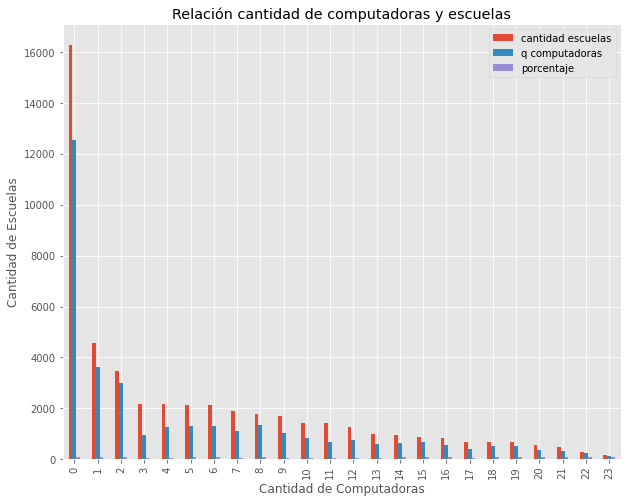

In [127]:
# GRAFICO DE LA RELACIÓN PORCENTUAL COMPUTADORAS/COLEGIOS

df_escuelas_computadoras.plot(figsize=(10,8),kind='bar')
plt.title("Relación cantidad de computadoras y escuelas")
plt.xlabel("Cantidad de Computadoras")
plt.ylabel("Cantidad de Escuelas")

## Cantidad de colegios con computadoras por sector

In [133]:
# FILTRO DE CANTIDAD DE COMPUTDORAS EN COLEGIOS POR SECTOR PUBLICO


q_computadoras_publico = q_computadoras.loc[q_computadoras['sector']=='Estatal',:]

q_computadoras_publico.shape

print("De un total de 38.338 colegios estatales, la cantidad que posee computadoras es de", q_computadoras_publico.shape)

De un total de 38.338 colegios estatales, la cantidad que posee computadoras es de (26993, 6)


*Colegios públicos con computadora por Provincia*

In [135]:
q_computadoras_publico['provincia'].value_counts()

Buenos Aires              8569
Córdoba                   2866
Santa Fe                  2333
Misiones                  1150
Chaco                     1145
Entre Ríos                1048
Ciudad de Buenos Aires     983
Corrientes                 946
Santiago del Estero        868
Mendoza                    835
Salta                      665
Formosa                    649
Tucumán                    632
Catamarca                  579
Río Negro                  558
San Juan                   539
Jujuy                      513
Chubut                     427
Neuquén                    425
La Rioja                   383
La Pampa                   323
San Luis                   264
Santa Cruz                 210
Tierra del Fuego            83
Name: provincia, dtype: int64

In [137]:
# FILTRO DE CANTIDAD DE COMPUTDORAS EN COLEGIOS POR SECTOR PRIVADO


q_computadoras_privado = q_computadoras.loc[q_computadoras['sector']=='Privado',:]

q_computadoras_privado.shape

print("De un total de 10728 colegios privados, la cantidad que posee computadoras es de", q_computadoras_privado.shape)

De un total de 10728 colegios privados, la cantidad que posee computadoras es de (7488, 6)


*Colegios privados con computadora por Provincia*

In [138]:
q_computadoras_privado['provincia'].value_counts()

Buenos Aires              3994
Córdoba                    750
Santa Fe                   656
Ciudad de Buenos Aires     364
Entre Ríos                 249
Tucumán                    207
Mendoza                    168
Chaco                      151
San Juan                   105
Misiones                    99
Río Negro                   93
Neuquén                     82
Corrientes                  78
Santiago del Estero         74
Chubut                      73
Salta                       71
La Pampa                    51
Jujuy                       49
Santa Cruz                  43
San Luis                    40
La Rioja                    28
Tierra del Fuego            23
Formosa                     22
Catamarca                   18
Name: provincia, dtype: int64

**Cantidad de computadoras por provincia y nivel educativo**

*Nivel Inicial*

In [139]:
q_computadoras_inicial= df_poblacion_filtro[
      (df_poblacion_filtro['Tenencia de computadora - Inicial'] == 'X')
].pivot_table(
    index=['provincia'],
    values=['id'],
    aggfunc='count'
    
)
q_computadoras_inicial.sort_values('id',ascending=False)

,id
provincia,
Buenos Aires,3892
Córdoba,1394
Santa Fe,840
Ciudad de Buenos Aires,804
Mendoza,543
Entre Ríos,372
Santiago del Estero,337
Chaco,301
Tucumán,270


*Nivel Primario*

In [140]:
q_computadoras_primaria= df_poblacion_filtro[
      (df_poblacion_filtro['Tenencia de computadora - Primaria'] == 'X')
].pivot_table(
    index=['provincia'],
    values=['id'],
    aggfunc='count'
    
)
q_computadoras_primaria.sort_values('id',ascending=False)

,id
provincia,
Buenos Aires,5365
Córdoba,1931
Santa Fe,1724
Entre Ríos,1009
Misiones,993
Chaco,881
Ciudad de Buenos Aires,856
Mendoza,812
Corrientes,755


*Nivel Secundario*

In [146]:
q_computadoras_secundaria= df_poblacion_filtro[
      (df_poblacion_filtro['Tenencia de computadora - Secundaria'] == 'X')
].pivot_table(
    index=['provincia'],
    values=['id'],
    aggfunc='count'
    
)
q_computadoras_secundaria.sort_values('id',ascending=False)

,id
provincia,
Buenos Aires,3880
Córdoba,935
Santa Fe,879
Entre Ríos,503
Ciudad de Buenos Aires,473
Tucumán,424
Misiones,420
Mendoza,377
Santiago del Estero,300


Gráfico comparativo en Nivel Secundario

Text(0, 0.5, 'Cantidad de computadoras en secundarios')

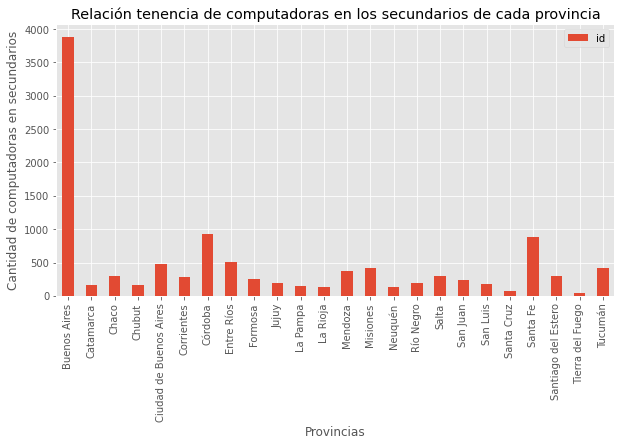

In [147]:
q_computadoras_secundaria.plot(kind='bar', figsize=(10,5))
plt.title("Relación tenencia de computadoras en los secundarios de cada provincia")
plt.xlabel("Provincias")
plt.ylabel("Cantidad de computadoras en secundarios")

**Cantidad total de colegios con computadoras por nivel**

 *Nivel Inicial*

In [148]:
tenencia_computadora_inicial= df_poblacion_filtro[df_poblacion_filtro['Tenencia de computadora - Inicial'] == 'X']
tenencia_computadora_inicial.shape


(10875, 6)

*Nivel Primario*

In [149]:
tenencia_computadora_primaria= df_poblacion_filtro[df_poblacion_filtro['Tenencia de computadora - Primaria'] == 'X']
tenencia_computadora_primaria.shape


(19703, 6)

*Nivel Secundario*

In [150]:
tenencia_computadora_secundaria= df_poblacion_filtro[df_poblacion_filtro['Tenencia de computadora - Secundaria'] == 'X']
tenencia_computadora_secundaria.shape


(10978, 6)

**Tenencia de Computadoras según nivel, filtrado por provincia específica**

In [152]:
computadora_inicial_bsas = df_poblacion_filtro[
    (df_poblacion_filtro['Tenencia de computadora - Inicial'] == 'X') &    
    (df_poblacion_filtro['provincia'] == 'Buenos Aires')
] 

computadora_primaria_bsas = df_poblacion_filtro[
    (df_poblacion_filtro['Tenencia de computadora - Primaria'] == 'X') &    
    (df_poblacion_filtro['provincia'] == 'Buenos Aires')
] 

computadora_secundaria_bsas = df_poblacion_filtro[
    (df_poblacion_filtro['Tenencia de computadora - Secundaria'] == 'X') &    
    (df_poblacion_filtro['provincia'] == 'Buenos Aires')
] 

print("Colegios con computadoras en Nivel Inicial en Buenos Aires:", computadora_inicial_bsas.shape)
print("Colegios con computadoras en Nivel Primario en Buenos Aires:", computadora_primaria_bsas.shape)
print("Colegios con computadoras en Nivel Secundario en Buenos Aires:", computadora_secundaria_bsas.shape)

Colegios con computadoras en Nivel Inicial en Buenos Aires: (3892, 6)
Colegios con computadoras en Nivel Primario en Buenos Aires: (5365, 6)
Colegios con computadoras en Nivel Secundario en Buenos Aires: (3880, 6)


***A los colegios con computadoras separados por nivel y por provincia, ahora se los filtra por sector también***

In [158]:
#BUENOS AIRES

computadoras_estatal_bsas_inicial = computadora_inicial_bsas.loc[computadora_inicial_bsas['sector']=='Estatal',:]
computadoras_privado_bsas_inicial = computadora_inicial_bsas.loc[computadora_inicial_bsas['sector']=='Privado',:]

computadoras_estatal_bsas_primaria = computadora_primaria_bsas.loc[computadora_primaria_bsas['sector']=='Estatal',:]
computadoras_privado_bsas_primaria = computadora_primaria_bsas.loc[computadora_primaria_bsas['sector']=='Privado',:]

computadoras_estatal_bsas_secundaria = computadora_secundaria_bsas.loc[computadora_secundaria_bsas['sector']=='Estatal',:]
computadoras_privado_bsas_secundaria = computadora_secundaria_bsas.loc[computadora_secundaria_bsas['sector']=='Privado',:]


print("Colegios con computadoras en Nivel Inicial sector público:", computadoras_estatal_bsas_inicial.shape)
print("Colegios con computadoras en Nivel Inicial sector privado:", computadoras_privado_bsas_primaria.shape)

print("Colegios con computadoras en Nivel Primario en Buenos Aires sector público:", computadoras_estatal_bsas_secundaria.shape)
print("Colegios con computadoras en Nivel Primario en Buenos Aires sector privado:", computadoras_privado_bsas_inicial.shape)

print("Colegios con computadoras en Nivel Secundario en Buenos Aires sector público:", computadoras_estatal_bsas_primaria.shape)
print("Colegios con computadoras en Nivel Secundario en Buenos Aires sector privado:", computadoras_privado_bsas_secundaria.shape)



Colegios con computadoras en Nivel Inicial sector público: (2311, 6)
Colegios con computadoras en Nivel Inicial sector privado: (1520, 6)
Colegios con computadoras en Nivel Primario en Buenos Aires sector público: (2419, 6)
Colegios con computadoras en Nivel Primario en Buenos Aires sector privado: (1581, 6)
Colegios con computadoras en Nivel Secundario en Buenos Aires sector público: (3845, 6)
Colegios con computadoras en Nivel Secundario en Buenos Aires sector privado: (1461, 6)


*Ejemplos con otras provincias*

In [107]:
#SANTA CRUZ

computadora_inicial_santacruz = df_poblacion_filtro[
    (df_poblacion_filtro['Tenencia de computadora - Inicial'] == 'X') &    
    (df_poblacion_filtro['provincia'] == 'Santa Cruz')
] 

computadora_primaria_santacruz = df_poblacion_filtro[
    (df_poblacion_filtro['Tenencia de computadora - Primaria'] == 'X') &    
    (df_poblacion_filtro['provincia'] == 'Santa Cruz')
] 

computadora_secundaria_santacruz = df_poblacion_filtro[
    (df_poblacion_filtro['Tenencia de computadora - Secundaria'] == 'X') &    
    (df_poblacion_filtro['provincia'] == 'Santa Cruz')
] 

print("Colegios con computadoras en Nivel Inicial en Santa Cruz:", computadora_inicial_santacruz.shape)
print("Colegios con computadoras en Nivel Primario en Santa Cruz:", computadora_primaria_santacruz.shape)
print("Colegios con computadoras en Nivel Secundario en Santa Cruz:", computadora_secundaria_santacruz.shape)

Cantidad de computadoras en inicial en Santa Cruz: (88, 6)
Cantidad de computadoras en primaria en Santa Cruz: (113, 6)
Cantidad de computadoras en secundaria en Santa Cruz: (78, 6)


In [159]:
computadoras_estatal_santacruz_inicial = computadora_inicial_santacruz.loc[computadora_inicial_santacruz['sector']=='Estatal',:]
computadoras_privado_santacruz_inicial = computadora_inicial_santacruz.loc[computadora_inicial_santacruz['sector']=='Privado',:]

computadoras_estatal_santacruz_primaria = computadora_primaria_santacruz.loc[computadora_primaria_santacruz['sector']=='Estatal',:]
computadoras_privado_santacruz_primaria = computadora_primaria_santacruz.loc[computadora_primaria_santacruz['sector']=='Privado',:]

computadoras_estatal_santacruz_secundaria = computadora_secundaria_santacruz.loc[computadora_secundaria_santacruz['sector']=='Estatal',:]
computadoras_privado_santacruz_secundaria = computadora_secundaria_santacruz.loc[computadora_secundaria_santacruz['sector']=='Privado',:]


print("Colegios con computadoras en Nivel Inicial en Santa Cruz sector público:", computadoras_estatal_santacruz_inicial.shape)
print("Colegios con computadoras en Nivel Inicial en Santa Cruz sector privado:", computadoras_privado_santacruz_primaria.shape)

print("Colegios con computadoras en Nivel Primario en Santa Cruz sector público:", computadoras_estatal_santacruz_secundaria.shape)
print("Colegios con computadoras en Nivel Primario en Santa Cruz sector privado:", computadoras_privado_santacruz_inicial.shape)

print("Colegios con computadoras en Nivel Secundario en Santa Cruz sector público:", computadoras_estatal_santacruz_primaria.shape)
print("Colegios con computadoras en Nivel Secundario en Santa Cruz sector privado:", computadoras_privado_santacruz_secundaria.shape)



Colegios con computadoras en Nivel Inicial en Santa Cruz sector público: (65, 6)
Colegios con computadoras en Nivel Inicial en Santa Cruz sector privado: (25, 6)
Colegios con computadoras en Nivel Primario en Santa Cruz sector público: (59, 6)
Colegios con computadoras en Nivel Primario en Santa Cruz sector privado: (23, 6)
Colegios con computadoras en Nivel Secundario en Santa Cruz sector público: (88, 6)
Colegios con computadoras en Nivel Secundario en Santa Cruz sector privado: (19, 6)


In [160]:
#SANTIAGO DEL ESTERO

computadora_inicial_santiagoestero = df_poblacion_filtro[
    (df_poblacion_filtro['Tenencia de computadora - Inicial'] == 'X') &    
    (df_poblacion_filtro['provincia'] == 'Santiago del Estero')
] 

computadora_primaria_santiagoestero = df_poblacion_filtro[
    (df_poblacion_filtro['Tenencia de computadora - Primaria'] == 'X') &    
    (df_poblacion_filtro['provincia'] == 'Santiago del Estero')
] 

computadora_secundaria_santiagoestero = df_poblacion_filtro[
    (df_poblacion_filtro['Tenencia de computadora - Secundaria'] == 'X') &    
    (df_poblacion_filtro['provincia'] == 'Santiago del Estero')
] 

print("Colegios con computadoras en Nivel Inicial en Santiago del Estero:", computadora_inicial_santiagoestero.shape)
print("Colegios con computadoras en Nivel Primario en Santiago del Estero:", computadora_primaria_santiagoestero.shape)
print("Colegios con computadoras en Nivel Secundario en Santiago del Estero:", computadora_secundaria_santiagoestero.shape)



Colegios con computadoras en Nivel Inicial en Santiago del Estero: (337, 6)
Colegios con computadoras en Nivel Primario en Santiago del Estero: (653, 6)
Colegios con computadoras en Nivel Secundario en Santiago del Estero: (300, 6)


In [161]:
computadoras_estatal_santiagoestero_inicial = computadora_inicial_santiagoestero.loc[computadora_inicial_santiagoestero['sector']=='Estatal',:]
computadoras_privado_santiagoestero_inicial = computadora_inicial_santiagoestero.loc[computadora_inicial_santiagoestero['sector']=='Privado',:]

computadoras_estatal_santiagoestero_primaria = computadora_primaria_santiagoestero.loc[computadora_primaria_santiagoestero['sector']=='Estatal',:]
computadoras_privado_santiagoestero_primaria = computadora_primaria_santiagoestero.loc[computadora_primaria_santiagoestero['sector']=='Privado',:]

computadoras_estatal_santiagoestero_secundaria = computadora_secundaria_santiagoestero.loc[computadora_secundaria_santiagoestero['sector']=='Estatal',:]
computadoras_privado_santiagoestero_secundaria = computadora_secundaria_santiagoestero.loc[computadora_secundaria_santiagoestero['sector']=='Privado',:]


print("Colegios con computadoras en Nivel Inicial en Santiago del Estero sector público:", computadoras_estatal_santiagoestero_inicial.shape)
print("Colegios con computadoras en Nivel Inicial en Santiago del Estero sector privado:", computadoras_privado_santiagoestero_primaria.shape)

print("Colegios con computadoras en Nivel Primario en Santiago del Estero sector público:", computadoras_estatal_santiagoestero_secundaria.shape)
print("Colegios con computadoras en Nivel Primario en Santiago del Estero sector privado:", computadoras_privado_santiagoestero_inicial.shape)

print("Colegios con computadoras en Nivel Secundario en Santiago del Estero sector público:", computadoras_estatal_santiagoestero_primaria.shape)
print("Colegios con computadoras en Nivel Secundario en Santiago del Estero sector privado:", computadoras_privado_santiagoestero_secundaria.shape)

Colegios con computadoras en Nivel Inicial en Santiago del Estero sector público: (292, 6)
Colegios con computadoras en Nivel Inicial en Santiago del Estero sector privado: (51, 6)
Colegios con computadoras en Nivel Primario en Santiago del Estero sector público: (232, 6)
Colegios con computadoras en Nivel Primario en Santiago del Estero sector privado: (45, 6)
Colegios con computadoras en Nivel Secundario en Santiago del Estero sector público: (602, 6)
Colegios con computadoras en Nivel Secundario en Santiago del Estero sector privado: (68, 6)


# **Carácteristicas de los Establecimientos**

In [162]:
# APERTURA DATASET CARACTERISTICAS DE LOS ESTABLECIMIENTOS

caracteristicas_estab_2018.columns


Index(['id', 'provincia', 'sector', 'ambito', 'Electricidad - Si',
       'Electricidad - Red pública', 'Electricidad - Grupo electrógeno',
       'Electricidad - Panel fotovoltaico/solar',
       'Electricidad - Generador eólico',
       'Electricidad - Generador hidráulico', 'Electricidad - Otro',
       'Equipamiento Establecimiento - Televisor',
       'Equipamiento Establecimiento - Sistema multimedia o Cañón',
       'Equipamiento Establecimiento - Scanner',
       'Equipamiento Establecimiento - Webcam',
       'Equipamiento Establecimiento - Reproductor de CD',
       'Equipamiento Establecimiento - Reproductor de DVD',
       'Equipamiento Establecimiento - Impresora',
       'Equipamiento Establecimiento - Equipo emisor de radio AM/FM',
       'Equipamiento Establecimiento - Equipo receptor de radio AM/FM',
       'Equipamiento Establecimiento - Servidor para uso escolar',
       'Equipamiento Establecimiento - Impresora 3D',
       'Equipamiento Establecimiento - Equipo de S

In [163]:
# FILTRO DE LOS ITEMS RELEVANTES 



caracteristicas_estab_2018_filtro= caracteristicas_estab_2018[['id','provincia', 'sector',
                        'Internet - Tipo de servicio - Gratuito',
                        'Internet - Tipo de servicio - Pago',
                        'Internet - Tipo de conexión - Telefónica',
                        'Internet - Tipo de conexión - ADSL',
                        'Internet - Tipo de conexión - Cable Módem',
                        'Internet - Tipo de conexión - Satelital',
                        'Internet - Tipo de conexión - Otro Tipo',
                        'Internet - Tipo de conexión - Móvil',
                        'Espacios con conexión - En el área de administración',
                        'Espacios con conexión - En las aulas',
                        'Espacios con conexión - En la biblioteca/s',
                        'Espacios con conexión - En otro espacio del establecimiento',
                        'Espacios con conexión - En el laboratorio',
                        'Dispone de sala o laboratorio de informática - Si']]
caracteristicas_estab_2018_filtro

,id,provincia,sector,Internet - Tipo de servicio - Gratuito,Internet - Tipo de servicio - Pago,Internet - Tipo de conexión - Telefónica,Internet - Tipo de conexión - ADSL,Internet - Tipo de conexión - Cable Módem,Internet - Tipo de conexión - Satelital,Internet - Tipo de conexión - Otro Tipo,Internet - Tipo de conexión - Móvil,Espacios con conexión - En el área de administración,Espacios con conexión - En las aulas,Espacios con conexión - En la biblioteca/s,Espacios con conexión - En otro espacio del establecimiento,Espacios con conexión - En el laboratorio,Dispone de sala o laboratorio de informática - Si
0,1780417329,Buenos Aires,Estatal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1494540024,Buenos Aires,Estatal,X,NaN,NaN,NaN,NaN,X,NaN,NaN,X,X,NaN,NaN,NaN,NaN
2,994100816,Buenos Aires,Estatal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,931968015,Buenos Aires,Estatal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2166248070,Buenos Aires,Estatal,NaN,X,NaN,X,NaN,NaN,NaN,NaN,X,X,X,NaN,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49429,20705248623,Tucumán,Privado,NaN,X,X,NaN,NaN,NaN,NaN,NaN,X,X,X,X,NaN,NaN
49430,23401752426,Tucumán,Privado,NaN,X,X,NaN,X,NaN,NaN,NaN,X,X,X,X,X,X
49431,19800761222,Tucumán,Privado,NaN,X,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,X,X,X
49432,21600900024,Tucumán,Privado,NaN,X,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN


## Tipo de conexión a nivel Nacional

In [164]:
tipo_de_conexion_nacional = caracteristicas_estab_2018[['id','provincia', 'sector',
                        'Internet - Tipo de servicio - Gratuito',
                        'Internet - Tipo de servicio - Pago',
                        'Internet - Tipo de conexión - Telefónica',
                        'Internet - Tipo de conexión - ADSL',
                        'Internet - Tipo de conexión - Cable Módem',
                        'Internet - Tipo de conexión - Satelital',
                        'Internet - Tipo de conexión - Otro Tipo',
                        'Internet - Tipo de conexión - Móvil']]
tipo_de_conexion_nacional


,id,provincia,sector,Internet - Tipo de servicio - Gratuito,Internet - Tipo de servicio - Pago,Internet - Tipo de conexión - Telefónica,Internet - Tipo de conexión - ADSL,Internet - Tipo de conexión - Cable Módem,Internet - Tipo de conexión - Satelital,Internet - Tipo de conexión - Otro Tipo,Internet - Tipo de conexión - Móvil
0,1780417329,Buenos Aires,Estatal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1494540024,Buenos Aires,Estatal,X,NaN,NaN,NaN,NaN,X,NaN,NaN
2,994100816,Buenos Aires,Estatal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,931968015,Buenos Aires,Estatal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2166248070,Buenos Aires,Estatal,NaN,X,NaN,X,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49429,20705248623,Tucumán,Privado,NaN,X,X,NaN,NaN,NaN,NaN,NaN
49430,23401752426,Tucumán,Privado,NaN,X,X,NaN,X,NaN,NaN,NaN
49431,19800761222,Tucumán,Privado,NaN,X,NaN,X,NaN,NaN,NaN,NaN
49432,21600900024,Tucumán,Privado,NaN,X,X,NaN,NaN,NaN,NaN,NaN


# **SACAMOS ESTO QUE SIGUE ACA?????** (desde acá hasta que arranca la tabla de cantidad de colegios con cada tipo de conexión por provincia)

In [166]:
#ADR: Queremos analizar a nivel nacional cuántas tienen un servicio pago y cuantas tienen un servicio gratuito

#MPV Agus acá tiraba error (invalid syntax) el print('Del total de establecimientos, '
# servicio_gratuito.count, 'tienen el servicio de internet gratuito') asi que probé cambiarlo por el "f" 
# pero si bien no da error, no dá el resultado buscado


servicio_gratuito= tipo_de_conexion_nacional[tipo_de_conexion_nacional['Internet - Tipo de servicio - Gratuito']== 'X']
servicio_pago= tipo_de_conexion_nacional[tipo_de_conexion_nacional['Internet - Tipo de servicio - Pago']== 'X']



In [ ]:
servicio_gratuito_provincias =servicio_gratuito['provincia'].value_counts().reset_index()
servicio_gratuito_provincias

servicio_gratuito_provincias.columns= ['provincia', 'servicio gratuito']
servicio_gratuito_provincias

,provincia,servicio gratuito
0,Buenos Aires,3834
1,Santa Fe,2882
2,Córdoba,1997
3,Ciudad de Buenos Aires,1037
4,Mendoza,942
5,Río Negro,619
6,San Juan,583
7,Formosa,459
8,Neuquén,424
9,San Luis,413


In [ ]:
servicio_pago_provincias =servicio_pago['provincia'].value_counts().reset_index()
servicio_pago_provincias

servicio_pago_provincias.columns= ['provincia', 'servicio pago']
servicio_pago_provincias

,provincia,servicio pago
0,Buenos Aires,6817
1,Córdoba,1482
2,Entre Ríos,945
3,Ciudad de Buenos Aires,709
4,Tucumán,519
5,Mendoza,504
6,Chaco,481
7,Misiones,415
8,Corrientes,368
9,Jujuy,246


In [ ]:
servicio_internet1 = servicio_gratuito_provincias.merge(
    servicio_pago_provincias, how='left',
    left_on="provincia",
    right_on="provincia"
)
servicio_internet =servicio_internet1.merge(
    q_escuelas_provincias, how='left',
    left_on="provincia",
    right_on="provincia"
)
servicio_internet



servicio_internet['cantidad de escuelas sin servicio de internet'] = servicio_internet['cantidad escuelas'] - servicio_internet['servicio pago'] - servicio_internet['servicio gratuito'] 

servicio_internet['porcentaje de escuelas sin internet'] = servicio_internet['cantidad de escuelas sin servicio de internet']*100 / servicio_internet['cantidad escuelas']

servicio_internet.sort_values('porcentaje de escuelas sin internet',ascending=False)

,provincia,servicio gratuito,servicio pago,cantidad escuelas,cantidad de escuelas sin servicio de internet,porcentaje de escuelas sin internet
22,Santiago del Estero,144,209,2171,1818,83.740212
18,Misiones,241,415,2163,1507,69.671752
15,Chaco,283,481,2121,1357,63.979255
7,Formosa,459,67,1416,890,62.853107
16,Catamarca,277,92,982,613,62.423625
11,Corrientes,346,368,1683,969,57.575758
13,Salta,336,231,1267,700,55.248619
19,Tucumán,234,519,1433,680,47.452896
20,Jujuy,193,246,829,390,47.044632
12,La Rioja,340,33,679,306,45.066274


 **Cantidad de colegios con cada tipo de conexión, por provincia**

In [167]:
conexion_modem= tipo_de_conexion_nacional[tipo_de_conexion_nacional['Internet - Tipo de conexión - Cable Módem']== 'X']
conexion_telefonica= tipo_de_conexion_nacional[tipo_de_conexion_nacional['Internet - Tipo de conexión - Telefónica']== 'X']
conexion_ASDL= tipo_de_conexion_nacional[tipo_de_conexion_nacional['Internet - Tipo de conexión - ADSL']== 'X']
conexion_satelital= tipo_de_conexion_nacional[tipo_de_conexion_nacional['Internet - Tipo de conexión - Satelital']== 'X']
conexion_movil= tipo_de_conexion_nacional[tipo_de_conexion_nacional['Internet - Tipo de conexión - Móvil']== 'X']
conexion_otrotipo= tipo_de_conexion_nacional[tipo_de_conexion_nacional['Internet - Tipo de conexión - Otro Tipo']== 'X']

conexion_modem_provincias =conexion_modem['provincia'].value_counts().reset_index()
conexion_modem_provincias


conexion_modem_provincias.columns= ['provincia', 'Conexion modem']
conexion_modem_provincias

conexion_telefonica_provincias =conexion_telefonica['provincia'].value_counts().reset_index()
conexion_telefonica_provincias

conexion_telefonica_provincias.columns= ['provincia', 'Conexion telefonica']
conexion_telefonica_provincias

conexion_ASDL_provincias =conexion_ASDL['provincia'].value_counts().reset_index()
conexion_ASDL_provincias

conexion_ASDL_provincias.columns= ['provincia', 'Conexion ASDL']
conexion_ASDL_provincias

conexion_satelital_provincias =conexion_satelital['provincia'].value_counts().reset_index()
conexion_satelital_provincias

conexion_satelital_provincias.columns= ['provincia', 'Conexion satelital']
conexion_satelital_provincias

conexion_movil_provincias =conexion_movil['provincia'].value_counts().reset_index()
conexion_movil_provincias

conexion_movil_provincias.columns= ['provincia', 'Conexion movil']
conexion_movil_provincias


conexion_otrotipo_provincias =conexion_otrotipo['provincia'].value_counts().reset_index()
conexion_otrotipo_provincias

conexion_otrotipo_provincias.columns= ['provincia', 'Otro tipo de conexion']
conexion_otrotipo_provincias


df1 = conexion_modem_provincias.merge(
    conexion_ASDL_provincias, how='left',
    left_on="provincia",
    right_on="provincia"
)

df2= df1.merge(conexion_movil_provincias, how='left',
    left_on="provincia",
    right_on="provincia"
)

df3= df2.merge(conexion_satelital_provincias, how='left',
    left_on="provincia",
    right_on="provincia"
)

df4= df3.merge(conexion_telefonica_provincias, how='left',
    left_on="provincia",
    right_on="provincia"
)
tipo_de_conexion= df4.merge(conexion_otrotipo_provincias, how='left',
    left_on="provincia",
    right_on="provincia"
)
tipo_de_conexion 



,provincia,Conexion modem,Conexion ASDL,Conexion movil,Conexion satelital,Conexion telefonica,Otro tipo de conexion
0,Buenos Aires,5777,1271,503.0,1063,2581,806
1,Córdoba,1760,653,236.0,403,1090,202
2,Ciudad de Buenos Aires,1337,160,143.0,84,185,271
3,Santa Fe,940,1825,253.0,89,3,706
4,Mendoza,564,235,65.0,408,283,220
5,Entre Ríos,471,177,72.0,263,299,129
6,Chaco,297,76,36.0,200,172,66
7,Corrientes,297,88,49.0,193,103,78
8,La Rioja,243,23,16.0,68,31,20
9,Tucumán,240,188,44.0,124,322,54


# **Áreas de colegios con conexión, según provincia y tipo de conexión**

In [168]:
conexion_en_espacios = caracteristicas_estab_2018[['id','provincia', 'sector','Espacios con conexión - En el área de administración',
                        'Espacios con conexión - En las aulas',
                        'Espacios con conexión - En la biblioteca/s',
                        'Espacios con conexión - En otro espacio del establecimiento',
                        'Espacios con conexión - En el laboratorio',
                        'Dispone de sala o laboratorio de informática - Si'
                        ]]
conexion_en_espacios


conexion_administracion= conexion_en_espacios[conexion_en_espacios['Espacios con conexión - En el área de administración']== 'X']
conexion_aula= conexion_en_espacios[conexion_en_espacios['Espacios con conexión - En las aulas']== 'X']
conexion_biblioteca= conexion_en_espacios[conexion_en_espacios['Espacios con conexión - En la biblioteca/s']== 'X']
conexion_otro= conexion_en_espacios[conexion_en_espacios['Espacios con conexión - En otro espacio del establecimiento']== 'X']
conexion_laboratorio= conexion_en_espacios[conexion_en_espacios['Espacios con conexión - En el laboratorio']== 'X']

conexion_administracion_provincias= conexion_administracion['provincia'].value_counts().reset_index()
conexion_administracion_provincias


conexion_administracion_provincias.columns= ['provincia', 'Espacio con conexión en el área de administración']
conexion_administracion_provincias

conexion_aula_provincias= conexion_aula['provincia'].value_counts().reset_index()
conexion_aula_provincias

conexion_aula_provincias.columns= ['provincia', 'Espacio con conexión en las aulas']
conexion_aula_provincias

conexion_biblioteca_provincias= conexion_biblioteca['provincia'].value_counts().reset_index()
conexion_biblioteca_provincias

conexion_biblioteca_provincias.columns= ['provincia', 'Espacio con conexión en la biblioteca']
conexion_biblioteca_provincias


conexion_laboratorio_provincias= conexion_laboratorio['provincia'].value_counts().reset_index()
conexion_laboratorio_provincias

conexion_laboratorio_provincias.columns= ['provincia', 'Espacio con conexión en el laboratorio']
conexion_laboratorio_provincias


conexion_otro_provincias= conexion_otro['provincia'].value_counts().reset_index()
conexion_otro_provincias

conexion_otro_provincias.columns= ['provincia', 'Otro lugar con conexion']
conexion_otro_provincias

df11 = conexion_administracion_provincias.merge(
    conexion_aula_provincias, how='left',
    left_on="provincia",
    right_on="provincia"
)
df11

df12= df11.merge(
    conexion_biblioteca_provincias, how='left',
    left_on="provincia",
    right_on="provincia"
)
df12

df13= df12.merge(
    conexion_laboratorio_provincias, how='left',
    left_on="provincia",
    right_on="provincia"
)

espacios_con_conexion= df13.merge(
    conexion_otro_provincias, how='left',
    left_on="provincia",
    right_on="provincia"
)

espacios_con_conexion

,provincia,Espacio con conexión en el área de administración,Espacio con conexión en las aulas,Espacio con conexión en la biblioteca,Espacio con conexión en el laboratorio,Otro lugar con conexion
0,Buenos Aires,10144,4227,3429,3589,3825
1,Córdoba,3243,2201,1405,1478,1597
2,Santa Fe,2888,6,9,7,5
3,Ciudad de Buenos Aires,1609,1250,1067,1076,902
4,Mendoza,1406,481,410,835,523
5,Entre Ríos,1150,519,488,394,415
6,Río Negro,776,362,309,351,338
7,Tucumán,723,190,211,331,253
8,San Juan,714,125,112,137,119
9,Chaco,711,230,185,179,185


# **Penetración por Hogares**

In [169]:
# MUESTRA ALEATORIA DEL DATASET DE PENETRACION POR HOGARES

penetracion.sample(24)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
111,2019,2,Río Negro,"61,09"
85,2019,3,Misiones,"39,33"
564,2014,3,Mendoza,"32,31"
301,2017,2,Misiones,"30,09"
446,2015,4,Neuquén,"58,29"
528,2014,4,Buenos Aires,"56,09"
469,2015,3,Misiones,"28,31"
543,2014,4,Río Negro,"45,48"
267,2017,3,Chaco,"29,98"
287,2017,3,Tucumán,"39,7"


# *Penetración por provincias en el año 2018*

In [170]:
penetracion_2018= penetracion.loc[penetracion['Año']==2018,:]
penetracion_2018_primertrimestre= penetracion_2018.loc[penetracion_2018['Trimestre']==1,:]
penetracion_2018_primertrimestre.sort_values('Accesos por cada 100 hogares',ascending=False)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
226,2018,1,La Pampa,"71,75"
238,2018,1,Tierra Del Fuego,"65,2"
221,2018,1,Córdoba,"63,52"
216,2018,1,Buenos Aires,"62,63"
236,2018,1,Santa Fe,"62,28"
230,2018,1,Neuquén,"61,52"
220,2018,1,Chubut,"53,72"
227,2018,1,La Rioja,"51,44"
231,2018,1,Río Negro,"49,82"
223,2018,1,Entre Ríos,"48,68"


# **ESTE EJEMPLO LO SACARÍA, NO SÉ SI ES RELEVANTE???**

# *Ejemplo de Penetración 2018 en una provincia específica*

In [ ]:
#Adr:filtramos la penetración en bsas, por ejemplo
penetracion_buenosaires= penetracion_2018.loc[penetracion_2018['Provincia']=='Buenos Aires',:]
penetracion_buenosaires



,Año,Trimestre,Provincia,Accesos por cada 100 hogares
144,2018,4,Buenos Aires,"64,6"
168,2018,3,Buenos Aires,"64,44"
192,2018,2,Buenos Aires,"62,78"
216,2018,1,Buenos Aires,"62,63"


# **Conclusión**

  Según los datos del Ministerio de Educación, existen **63.000** colegios en todo el  territorio Argentino, de los cuales se encuentran relevados **49.434** - *38.388* estatales, *10.728* privados y *368* cooperativas-.

  Al analizar la cantidad de computadoras por colegio, observamos que **34.612** establecimientos cuentan al menos con 1 (una) computadora.


  De los sectores a analizar de nuestro interés (escuelas públicas y privadas) se concluyó que **26.993** de las escuelas que cuentan con al menos 1 (una) computadora son **públicas** y **7.488** son **privadas**; esto representa una **relación del 70% **(7 de cada 10) de colegios que tienen computadoras respecto de los que no, tanto en un sector como en el otro.

  En un análisis más profundo, indagamos respecto a la relación de la cantidad de computadoras por colegios, de cada provincia en particular, y obtuvimos que **Santa Cruz** es quien tiene mayor porcentaje (**90%**, es decir, 9 de cada 10 colegios tienen al menos una computadora), seguida por **Santa Fe** (**86%**) y  **Córdoba** (**79%**). Asimismo, en el otro extremo observamos que las provincias peor posicionadas en esa relación son **Santiago del Estero** (**43%**) y luego **Formosa** (**50%**). 

  Cuando filtramos por niveles de escolaridad dentro de todo el **País**, vimos que en el *Nivel Inicial* hay **10.875** computadoras en total, en el *Nivel Primario* **19.703** y en el *Nivel Secundario* **10.978**. 

  Luego analizamos los dos extremos de provincias con más y menos computadoras en relación a la cantidad de colegios, por sector y encontramos, que cada una posee en sus distintos niveles:


  **Santa Cruz** -provincia que más computadoras tiene en relación a los colegios -
  
  *Nivel inicial*: 65 público / 25 privado = 90 total

  *Nivel Primario*: 59 público / 23 privado = 82 total
 
  *Nivel Secundario*: 88 público / 19 privado = 107 total


  **Santiago del Estero** -provincia que más computadoras tiene en relación a los colegios -
 
  *Nivel inicial*: 292 público / 51 privado = 343 total

  *Nivel Primario*: 232 público /  45 privado = 277 total
 
  *Nivel Secundario*: 602 público / 68 privado = 670 total


  Respecto a las características de los establecimientos, sobre el tipo de conexión, surje del análisis que la mayoría de las provincias cuentan con conexión Modem en primer lugar o teléfonica en segundo; también pudimos observar el hecho de que algunas provincias tienen conexión satelital, la cuál si bien es considerablemente más costosa, dependiendo de las regiones, no queda otra opción que hacer uso de la misma.
  
  Cabe resaltar, que muchos colegios en distintas provincias, cuentan con conexión en el área administrativa pero no siempre en las aulas, y que si bien esto es superior al lado de los establecimientos que ni siquiera poseen internet o computadora directamente, sigue siendo una herramienta de la que, si no llega a las aulas, o mínimamente a los laboratorios, los alumnos no pueden hacer uso.


  Por otra parte, considerando los distintos tipos de conexión, nos detuvimos a considerar la cantidad de colegios que **NO** cuentan con acceso a internet, indistintamente de si poseen o no computadora alguna.  

  *Ejemplos*:


**Santa Cruz** - provincia con más computadoras por colegio:

**21%** de los colegios **NO** poseen internet 

--> porcentaje que se condice con las escuelas que no tienen computadoras

**Santiago del estero** - provincia con menos computadoras por colegio:

**84%** de los colegios **NO** poseen internet 

--> De las 2100 escuelas, 1764 no tienen internet; recordemos que solamente el 43% de los colegios NO poseen computadoras en esta provincia, por lo cual, estamos observando que del 57% que **si tiene computadora**, existe un **41% SIN acceso a internet**.

**Ciudad Autónoma de Buenos Aires**:

**2,5%** colegios **NO** poseen internet 

--> de los 1791 establecimientos, solamente 45 no tienen internet.

 Finalmente, para poder comprender esto que acabamos de plantear sobre el hecho de que los colegios tengan computadoras pero no acceso a internet, analizamos un dataset del ENACOM que explica sobre la **Penetración por hogares**. 

 En el mismo señala que la que mejor Penetración la tiene la *Ciudad Autónoma de Buenos Aires* con **106.24 cada 100 hogares**, luego la provincia de *La Pampa* con **71,75**, mientras que en el otro extremo, la provincia con menos Penetración por Hogar es *San Luis* (**15,15**), seguida por *Formosa* (**21,4**).

 En un contexto como el que se atraviesa en el 2020 por el COVID-19, quedó completamente expuesta la necesidad del acceso a internet para el avance y el desarrollo de la sociedad en distintas areas. 

 En el sector educativo fue extremadamente notoria la diferencia de dónde se encontraban listos para afrontar una situación así y dónde no.
 
 Si bien aún no contamos con los resultados publicados de las pruebas Aprender 2020, no estaría haciendo falta verlas para poder deducir que un colegio que no cuenta con computadora -por lo que se estima que su alumnado quizás ni tenga acceso a una en su hogar- y no posee ningún tipo de conexión a internet -lo cuál señala la urgencia en mejorar y aumentar la Penetración por Hogares en regiones alejadas- no pudo estar a la altura de la situación, perjudicando gravemente al estudiante, generándole la pérdida del año lectivo, sumado al hecho de que ya por no haber contado nunca con esas herramientas se encuentra por debajo de lo que hoy es una **demanda mundial: el óptimo manejo de computadoras e internet**
